# Simple Harmonic Oscillator

Numerical solution of the harmonic oscillator using various integration methods. Compares Euler, Verlet, and Runge-Kutta algorithms for energy conservation and stability.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
#differential equation solver functions:

def euler(step , x0 , v0):
    h = t_max / step
    v = np.zeros(step)
    x = np.zeros(step)
    t = np.arange(step) * h 
    x[0] = x0
    v[0] = v0
    for i in range(step-1):
        v[i+1] = v[i] - x[i] * h
        x[i+1] = x[i] + v[i] * h       
    return x,v,t

def euler_kremer(step , x0 , v0):
    h = t_max / step
    v = np.zeros(step)
    x = np.zeros(step)
    t = np.arange(step) * h 
    x[0] = x0
    v[0] = v0
    for i in range(step-1):
        v[i+1] = v[i] - x[i] * h
        x[i+1] = x[i] + v[i+1] * h
    return x,v,t

def verlet(step , x0 , v0):
    h = t_max / step
    v = np.zeros(step)
    x = np.zeros(step)
    t = np.arange(step) * h 
    x[0] = x0
    x[1] = x0 + v0 * h
    v[0] = v0
    for i in range(1 , step-1):
        x[i+1] = 2 * x[i] - x[i-1] - x[i] * (h**2)
    for i in range(1 , step-1):
        v[i] = (x[i+1] - x[i-1]) / (2 * h)     
    return x,v,t    
    
def fast_verlet(N , x0 , v0):
    h = t_max / step
    v = np.zeros(step)
    x = np.zeros(step)
    t = np.arange(step) * h 
    x[0] = x0
    v[0] = v0
    for i in range(step-1):
        x[i+1] = x[i] + v[i] * h - x[i] * (h**2 /2)
        v[i+1] = v[i] - (x[i] + x[i+1]) * (h/2)
    return x,v,t   

def Bimann(N , x0 , v0):
    h = t_max / step
    v = np.zeros(step)
    x = np.zeros(step)
    t = np.arange(step) * h 
    x[0] = x0
    x[1] = x0 + v0 * h 
    v[0] = v0
    for i in range(1, step-1):
        x[i+1] = x[i] + v[i] * h - ( 4 * x[i] - x[i-1]) * (h**2 /6)
        v[i+1] = v[i] - h/6 * (2 * x[i+1] + 5 * x[i] - x[i-1])
    return x,v,t  


In [ ]:
period = 2 * np.pi
t_max  = 10 * period
x_0    = 0.5
v_0    = 0


step = int(1e4)
euler_x, euler_v, euler_t = euler(step, x_0, v_0)
euler_kremer_x, euler_kremer_v, euler_kremer_t = euler_kremer(step, x_0, v_0)
verlet_x, verlet_v, verlet_t = verlet(step, x_0, v_0)
fast_verlet_x, fast_verlet_v, fast_verlet_t = fast_verlet(step, x_0, v_0)
Bimann_x, Bimann_v, Bimann_t = Bimann(step, x_0, v_0)

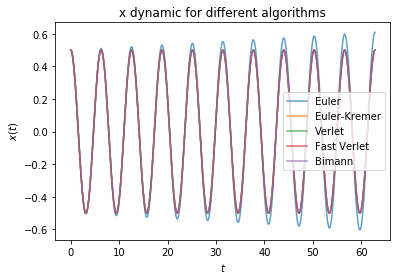

In [17]:
plt.plot(euler_t, euler_x, alpha = 0.7, label = 'Euler')
plt.plot(euler_kremer_t, euler_kremer_x, alpha = 0.7, label = 'Euler-Kremer')
plt.plot(verlet_t, verlet_x, alpha = 0.7, label = 'Verlet')
plt.plot(fast_verlet_t, fast_verlet_x, alpha = 0.7, label = 'Fast Verlet')
plt.plot(Bimann_t, Bimann_x, alpha = 0.7, label = 'Bimann')

plt.title("x dynamic for different algorithms")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend()

plt.savefig("SHO.png")

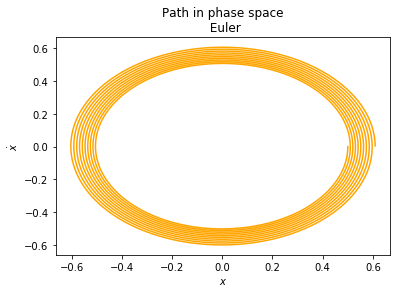

In [22]:
plt.plot(euler_x, euler_v, c = 'orange')
plt.title("Path in phase space\n Euler")
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")

plt.savefig("phase01.png")

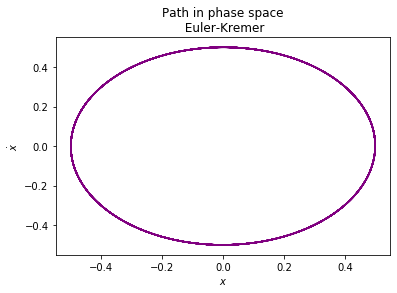

In [28]:
plt.plot(euler_kremer_x, euler_kremer_v, c = 'purple')
plt.title("Path in phase space\n Euler-Kremer")
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")

plt.savefig("phase02.png")

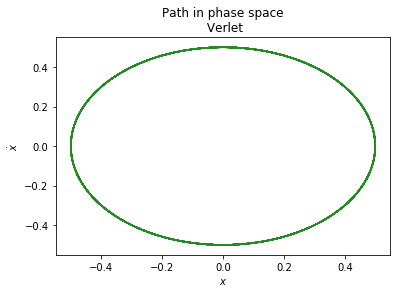

In [27]:
plt.plot(verlet_x, verlet_v, c = 'forestgreen')
plt.title("Path in phase space\n Verlet")
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")

plt.savefig("phase03.png")

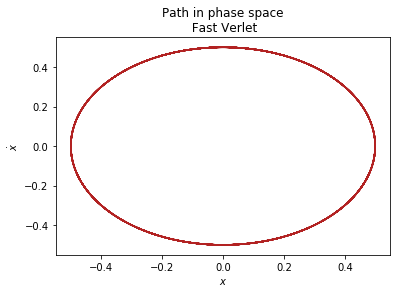

In [30]:
plt.plot(fast_verlet_x, fast_verlet_v, c = 'firebrick')
plt.title("Path in phase space\n Fast Verlet")
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")

plt.savefig("phase04.png")

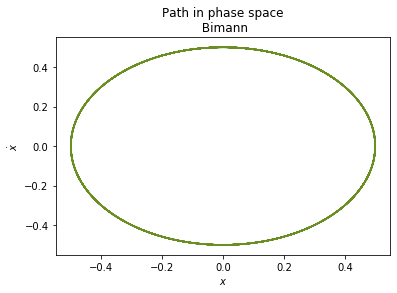

In [31]:
plt.plot(Bimann_x, Bimann_v, c = 'olivedrab')
plt.title("Path in phase space\n Bimann")
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")

plt.savefig("phase05.png")